In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Dropout, Activation
style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
def handle_non_numerical_data(data):
    columns = data.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if data[column].dtype != np.int64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            
            data[column] = list(map(convert_to_int, data[column]))
    return data

In [3]:
train_data = pd.read_csv("/home/mdeogune/Downloads/Recog_data_release/train.csv")
test_data = pd.read_csv("/home/mdeogune/Downloads/Recog_data_release/test.csv")

train_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
1,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
2,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
3,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
4,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [4]:
train_data = handle_non_numerical_data(train_data)
print(train_data.shape)



(632, 33)


In [5]:
X = train_data.drop(['G3'], 1)
X['studytime']=X['studytime']**2                    
y = train_data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_test.columns.values)

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2']


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Merge
from keras.optimizers import SGD, Adam, RMSprop,Nadam,Adagrad,TFOptimizer
from keras.callbacks import ModelCheckpoint

batch_size = 128
nb_classes = 10
nb_epoch =100

checkpoint = ModelCheckpoint(filepath='Adagrad.h5', verbose=1, save_best_only=True)

In [73]:
model = Sequential()
model.add(Dense(40, activation="tanh", input_shape=(32,)))
# model.add(Dropout(0.1))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
# model.add(Dense(50, activation="relu"))
# model.add(Dropout(1))
model.add(Dense(1))
# model.add(Activation('softmax'))
model.load_weights('Adagrad.h5')
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=Adagrad(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, callbacks=[checkpoint],validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 40)                1320      
_________________________________________________________________
dense_126 (Dense)            (None, 30)                1230      
_________________________________________________________________
dense_127 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 11        
Total params: 2,871
Trainable params: 2,871
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 505 samples, validate on 127 samples
Epoch 1/100
505/505 [==============================] - 2s 3ms/step - loss: 29.1724 - acc: 0.2891 - val_loss: 6.3086 - val_acc: 0.0551
Epoch 2/100
505/505 [==============================] - 0s 78us/step - loss: 2.3752 - acc: 0.2851 - val_loss: 0.3459 - val_acc: 0.5906
Epoch 3/100
505/505 [==============================] - 0s 98us/step - loss: 0.2505 - acc: 0.6950 - val_loss: 0.2757 - val_acc: 0.6457
Epoch 4/100
505/505 [==============================] - 0s 89us/step - loss: 0.1775 - acc: 0.7703 - val_loss: 0.2527 - val_acc: 0.7244
Epoch 5/100
505/505 [==============================] - 0s 107us/step - loss: 0.1337 - acc: 0.8198 - val_loss: 0.2250 - val_acc: 0.7402
Epoch 6/100
505/505 [==============================] - 0s 90us/step - loss: 0.1027 - acc: 0.8733 - val_loss: 0.2047 - val_acc: 0.7795
Epoch 7/100
505/505 [==============================] - 0s 103us/step - loss: 0.0854 - acc: 0.9030 - val_loss: 0.1976 - val_acc: 0.8031
Epoch 8/100
50

505/505 [==============================] - 0s 43us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.1393 - val_acc: 0.8898
Epoch 60/100
505/505 [==============================] - 0s 47us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.1402 - val_acc: 0.8898
Epoch 61/100
505/505 [==============================] - 0s 50us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.1362 - val_acc: 0.8898
Epoch 62/100
505/505 [==============================] - 0s 46us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.1401 - val_acc: 0.8898
Epoch 63/100
505/505 [==============================] - 0s 51us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.1372 - val_acc: 0.8898
Epoch 64/100
505/505 [==============================] - 0s 125us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.1356 - val_acc: 0.8898
Epoch 65/100
505/505 [==============================] - 0s 49us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.1368 - val_acc: 0.8898
Epoch 66/100
505/505 [==============================] - 0s 97us/ste

Epoch 90/100
505/505 [==============================] - 0s 45us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.1332 - val_acc: 0.9055
Epoch 91/100
505/505 [==============================] - 0s 55us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.1324 - val_acc: 0.9055
Epoch 92/100
505/505 [==============================] - 0s 128us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.1303 - val_acc: 0.9055
Epoch 93/100
505/505 [==============================] - 0s 34us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.1316 - val_acc: 0.9055
Epoch 94/100
505/505 [==============================] - 0s 52us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.1321 - val_acc: 0.9055
Epoch 95/100
505/505 [==============================] - 0s 41us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.1325 - val_acc: 0.9055
Epoch 96/100
505/505 [==============================] - 0s 44us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.1307 - val_acc: 0.9055
Epoch 97/100
505/505 [==============================] 

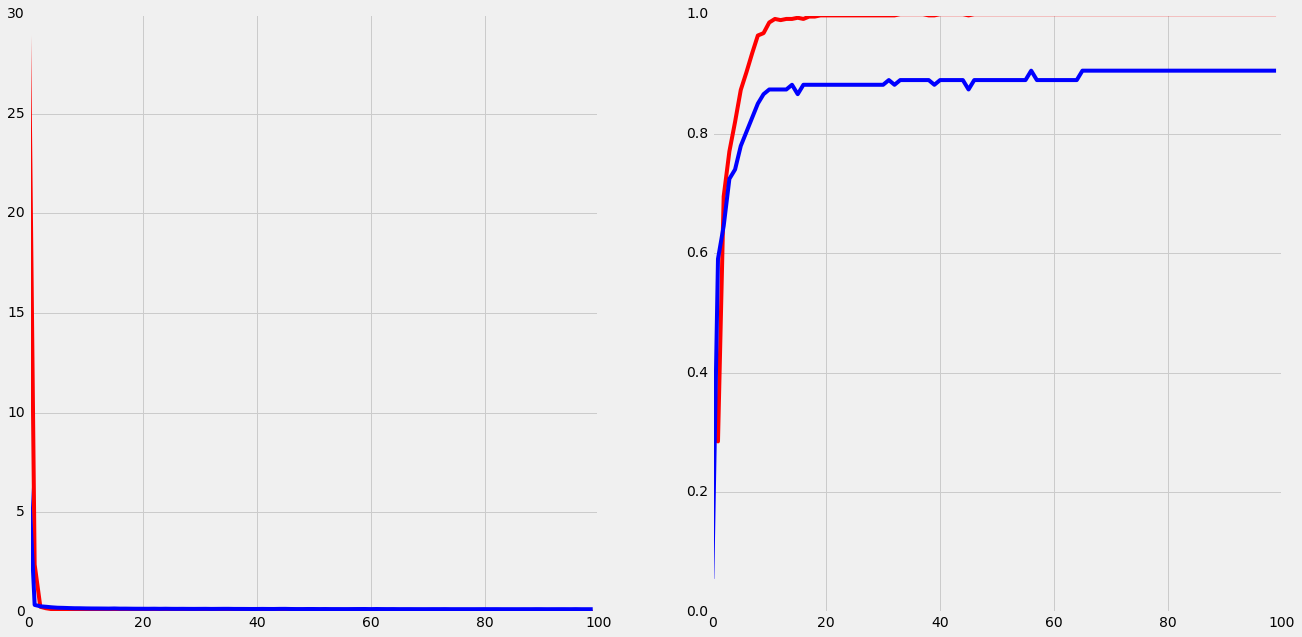

In [75]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['acc'], color='r')
ax2.plot(history.history['val_acc'], color='b')
plt.show()

##sgd

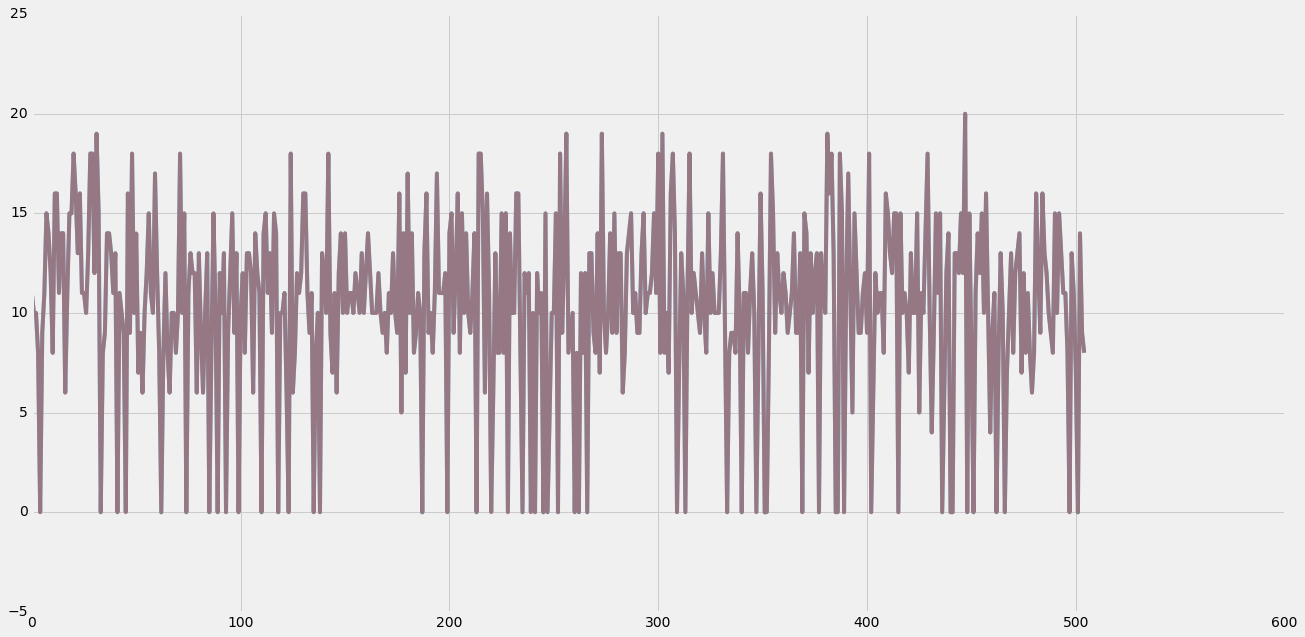

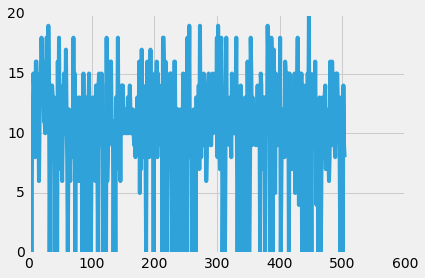

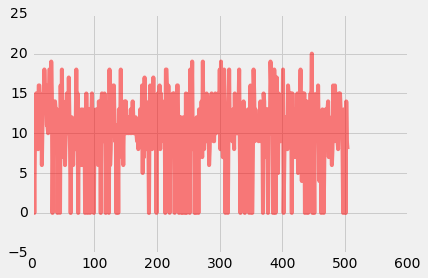

In [67]:
# test_data = handle_non_numerical_data(test_data)
# print (test_data.head())
# X_t = test_data.drop(['G3'], 1)



Xt = model.predict(X_train)
plt.figure(figsize=(20,10))
plt.plot((Xt), )
plt.plot((y_train.reshape(-1,1)),alpha=0.5)

plt.show()
plt.plot((y_train.reshape(-1,1)))
plt.show()
plt.plot((Xt), color="red",alpha=0.5 )
plt.show()